# <font color='blue'> GOLD PRICE PREDICTION: </font> 

# <font color='orange'>An attempt to create a 'ML goose' that lays golden eggs </font> 


 <font color='blue'> ** by Erika Atsumi-Stewart ** </font> 

______________________________

## PROJECT IDEA EXPLAINED

With Machine Learning, can we forecast tomorrow's GOLD PRICE using inputs avaiable today? My first Data Science project attempts to answer this question. 

What drives GOLD PRICE?

Generally, investors turn to GOLD when we expect an economic downturn / shaky equity markets / inflationary environment, and we are looking for a safe-heaven. In economic good times, GOLD is not a great investment as it doesn’t provide any dividend. Moreover, unlike copper, most of physical gold is not 'consumed,' but used as storage of value. The six features are chosen because they are generally considered good indicators of economic health indicator /equity market indicator / inflationary environment.

With that knowledge, I chose daily data of six independent variables (X) which may explain the movement in GOLD PRICE (y). 

These variables are 

1) US Inflation (as expressed in US Consumer Price Index),

2) Demand for bonds (as expressed in 5-yr Treasury bond yield),

3) Demand for Crypto Currency (as expressed in ETH Ethereum closing price),

4) Swiss Franc / USD exchange rate,

5) Chinese RMB / USD exchange rate, and 

6) Oil Price (as expressed in Crude Oil closing price)

Using historical GOLD PRICE against historical values of the above six features,
I tried to run the following four regression models.

1) Decision Tree Regression, 

2) Random Forest Regression, 

3) XG Boost Regressor, and 

4) Multivariable Linear Regression. 


Historical data was downloaded from www.NASDAQ.com

## CONCLUSION

1) Random Forest Regression Model gave the lowest Mean Square Error

2) Linear Regression Model gave R-Square of 62% and very large MSE

3) The linear regression model's prediction for Jan 14th gold price was off by 3.8%.

### as such, we cannot count on my 'ML goose' to lay golden eggs consistently.

## ANALYSIS


First step...

## 1) IMPORTING DATA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Historical Gold Price
Gold_price = pd.read_csv('GC CMX GOLD HistoricalData.csv')
Gold_price = Gold_price.rename(columns={'Close/Last':'GOLD'})
print(Gold_price.describe())
print(Gold_price.head())

#Feature 1: US Inflation (US Consumer Price Index)
US_CPI = pd.read_csv('USCPI HistoricalData.csv')
US_CPI = US_CPI.rename(columns={'Close/Last':'CPI'})
print(US_CPI.describe())
print(US_CPI.head())

#Feature 2: Bond Market (5-yr Treasury Bond)
Treasury = pd.read_csv('CMTN5Y (5yr Constant Maturity Treasury) HistoricalData.csv')
Treasury = Treasury.rename(columns={'Close/Last':'BOND'})
print(Treasury.describe())
print(Treasury.head())

#Feature 3: Cryptocurrency (Ethereum) 
Cryptocurrency = pd.read_csv('ETH Ethereum HistoricalData.csv')
Cryptocurrency = Cryptocurrency.rename(columns={'Close/Last':'CRYPTO'})
print(Cryptocurrency.describe())
print(Cryptocurrency.head())

#Feature 4: Exchange Rate (Chinese RMB Futures/US$)  
RMB = pd.read_csv('RMB Futures HistoricalData.csv')
RMB = RMB.rename(columns={'Close/Last':'CHINA EX RATE'})
print(RMB.describe())
print(RMB.head())

#Feature 5: Exchange Rate (Swiss Franc/US$)  
SwissF = pd.read_csv('USDCHF Swiss Franc HistoricalData.csv')
SwissF = SwissF.rename(columns={'Close/Last':'SWISS EX RATE'})
print(SwissF.describe())
print(SwissF.head())

#Feature 6: Oil Price (Crude Oil price)  
Crude_Oil = pd.read_csv('CL NMX (Crude oil) HistoricalData.csv')
Crude_Oil = Crude_Oil.rename(columns={'Close/Last':'OIL'})
print(Crude_Oil.describe())
print(Crude_Oil.head())

              GOLD         Volume         Open         High          Low
count  2555.000000    2511.000000  2555.000000  2555.000000  2555.000000
mean   1426.429393  179509.349263  1426.330607  1435.599687  1416.844775
std     240.413982   97554.395160   240.440476   241.942156   238.361554
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1243.600000  117560.000000  1243.100000  1251.250000  1235.500000
50%    1318.900000  164102.000000  1319.700000  1326.600000  1311.200000
75%    1649.350000  229346.500000  1649.800000  1662.600000  1637.850000
max    2069.400000  787217.000000  2076.400000  2082.100000  2049.000000
         Date    GOLD    Volume    Open    High     Low
0  01/11/2022  1818.5  165152.0  1801.3  1823.1  1799.7
1  01/10/2022  1798.8  153934.0  1796.4  1802.0  1789.3
2  01/07/2022  1797.4  218941.0  1791.0  1798.4  1781.3
3  01/06/2022  1789.2  233180.0  1810.6  1811.6  1785.4
4  01/05/2022  1825.1  167651.0  1815.2  1830.7  1808.2
       

## 2) PUTTING ALL DATA INTO A SINGLE DATAFRAME MATCHED BY DATE 

In [13]:
SINGLE = pd.merge(Gold_price, US_CPI, left_on='Date', right_on='Date', how = 'left')
SINGLE = pd.merge(SINGLE, Treasury,left_on='Date', right_on='Date', how = 'left')
SINGLE = pd.merge(SINGLE, Cryptocurrency,left_on='Date', right_on='Date', how = 'left')
SINGLE = pd.merge(SINGLE, RMB,left_on='Date', right_on='Date', how = 'left')
SINGLE = pd.merge(SINGLE, SwissF,left_on='Date', right_on='Date', how = 'left')
SINGLE = pd.merge(SINGLE, Crude_Oil,left_on='Date', right_on='Date', how = 'left')
SINGLE = SINGLE[['Date','GOLD', 'CPI', 'BOND','CRYPTO','CHINA EX RATE','SWISS EX RATE','OIL']]
print(SINGLE)

            Date    GOLD  CPI  BOND   CRYPTO  CHINA EX RATE  SWISS EX RATE  \
0     01/11/2022  1818.5  0.8  1.51  3224.57        0.15624         0.9234   
1     01/10/2022  1798.8  0.8  1.53  3112.72        0.15618         0.9265   
2     01/07/2022  1797.4  0.8  1.50  3224.46        0.15604         0.9185   
3     01/06/2022  1789.2  0.8  1.47  3205.80        0.15575         0.9214   
4     01/05/2022  1825.1  0.8  1.43  3443.32        0.15689         0.9174   
...          ...     ...  ...   ...      ...            ...            ...   
2550  01/18/2012  1659.9 -0.1  0.82      NaN        0.15885            NaN   
2551  01/17/2012  1655.6 -0.1  0.79      NaN        0.15883            NaN   
2552  01/16/2012  1630.8 -0.1  0.80      NaN        0.15851            NaN   
2553  01/13/2012  1630.8 -0.1  0.80      NaN        0.15851            NaN   
2554  01/12/2012  1647.7 -0.1  0.84      NaN        0.15850            NaN   

         OIL  
0      81.22  
1      78.23  
2      78.90  
3  

## 3) DATA CLEAN UP

1) I dropped all 'NaN' and outlier oil prices 

2) I noticed negative numbers for cruce oil prices which do not make sense. 

3) I also noticed determined that curide oil prices below $10 in thin trading volume
day are outliers.

2) and 3) were eliminated.

In [14]:
# 1) Eliminateing Rows with NaNs 
SINGLE = SINGLE.dropna(axis=0)
print(SINGLE) #Dataset became much smaller

# 2) Eliminating rows when data in 'OIL' column is negative
SINGLE = SINGLE[(SINGLE.OIL > 10)]
print(SINGLE.info)
print(SINGLE.shape)
print(SINGLE.describe()) 

           Date    GOLD  CPI  BOND   CRYPTO  CHINA EX RATE  SWISS EX RATE  \
0    01/11/2022  1818.5  0.8  1.51  3224.57        0.15624         0.9234   
1    01/10/2022  1798.8  0.8  1.53  3112.72        0.15618         0.9265   
2    01/07/2022  1797.4  0.8  1.50  3224.46        0.15604         0.9185   
3    01/06/2022  1789.2  0.8  1.47  3205.80        0.15575         0.9214   
4    01/05/2022  1825.1  0.8  1.43  3443.32        0.15689         0.9174   
..          ...     ...  ...   ...      ...            ...            ...   
714  03/14/2019  1293.4  0.2  2.43   132.61        0.14869         1.0038   
715  03/13/2019  1309.3  0.2  2.42   132.06        0.14899         1.0046   
716  03/12/2019  1296.3  0.2  2.41   133.80        0.14896         1.0076   
717  03/11/2019  1291.1 -0.1  2.44   133.42        0.14843         1.0105   
718  03/08/2019  1299.3 -0.1  2.42   133.85        0.14842         1.0080   

       OIL  
0    81.22  
1    78.23  
2    78.90  
3    79.46  
4    77.85

After clean up, data from early March 2019 to early Jan 2022 are chosen for analysis, with 669 rows of data

## 4) EXPLORING CORRELATION

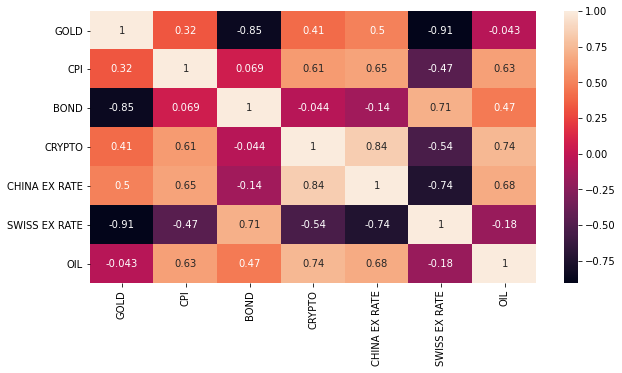

GOLD             1.000000
CPI              0.322871
BOND            -0.848486
CRYPTO           0.409482
CHINA EX RATE    0.500510
SWISS EX RATE   -0.905170
OIL             -0.042710
Name: GOLD, dtype: float64 



In [15]:
cor = SINGLE.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor, annot= True)
plt.show()

print(cor['GOLD'], '\n')

Interestingly, Bond Prices and Swiss Frank-to-US$ Exchange Rates are highly correlated to Gold Prices.  

Bond is a 5-yr yield (inverse to bond price), so it is inversely related to Gold price.
Swiss Ex rate (CHF/US$) is inverversely related to Gold price as weaker CHF 
means less demand for CHF, and investors are not looking for safety.

## 5) ASSIGNING DEPENDENT (y) AND INDEPENDENT (X) VARIABLES TO USE WITH MODELS 

In [16]:
y=SINGLE.GOLD
print(y.head())
SINGLE_features = ['CPI', 'BOND','CRYPTO','CHINA EX RATE','SWISS EX RATE','OIL']
X=SINGLE[SINGLE_features]
print(X.head())
print(X.shape)

0    1818.5
1    1798.8
2    1797.4
3    1789.2
4    1825.1
Name: GOLD, dtype: float64
   CPI  BOND   CRYPTO  CHINA EX RATE  SWISS EX RATE    OIL
0  0.8  1.51  3224.57        0.15624         0.9234  81.22
1  0.8  1.53  3112.72        0.15618         0.9265  78.23
2  0.8  1.50  3224.46        0.15604         0.9185  78.90
3  0.8  1.47  3205.80        0.15575         0.9214  79.46
4  0.8  1.43  3443.32        0.15689         0.9174  77.85
(669, 6)


## 5a) SHIFTING INPUT (FEATURES) BY 1 DAY SO THE MODEL MAY USE YESTERDAY'S INPUTS TO FORECAST TODAY'S GOLD PRICE 

In [17]:
X = X.shift(periods=1)
print('\nShifted Dataframe')
print(X.head())

X = X.fillna(method='ffill').fillna(method='bfill')
# Fills NaN with one before or one after NaN
print('\nShifted Dataframe without NaN')
print(X.head())


Shifted Dataframe
   CPI  BOND   CRYPTO  CHINA EX RATE  SWISS EX RATE    OIL
0  NaN   NaN      NaN            NaN            NaN    NaN
1  0.8  1.51  3224.57        0.15624         0.9234  81.22
2  0.8  1.53  3112.72        0.15618         0.9265  78.23
3  0.8  1.50  3224.46        0.15604         0.9185  78.90
4  0.8  1.47  3205.80        0.15575         0.9214  79.46

Shifted Dataframe without NaN
   CPI  BOND   CRYPTO  CHINA EX RATE  SWISS EX RATE    OIL
0  0.8  1.51  3224.57        0.15624         0.9234  81.22
1  0.8  1.51  3224.57        0.15624         0.9234  81.22
2  0.8  1.53  3112.72        0.15618         0.9265  78.23
3  0.8  1.50  3224.46        0.15604         0.9185  78.90
4  0.8  1.47  3205.80        0.15575         0.9214  79.46


## 6) BUILDING MODEL No.1 : DECISION TREE REGRESSOR  

In [18]:
from sklearn.tree import DecisionTreeRegressor
SINGLE_model = DecisionTreeRegressor(random_state=0)
SINGLE_model.fit(X,y)

DecisionTreeRegressor(random_state=0)

## 6a) SPLITTIG DATASET INTO TRAINING AND TESTING DATASETS FOR DECISION TREE REGRESSOR

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# For time series, splitting the data randomly doesn't make sense. 
# Here, I train the model using first 550 days of data (roughly a 82%-18% split).   

# cut_off = 550
train_X = X.iloc[0:550]
train_y = y.iloc[0:550]
val_X = X.iloc[550:]
val_y = y.iloc[550:]  
      
SINGLE_model = DecisionTreeRegressor()
SINGLE_model.fit(train_X,train_y)

val_predictions = SINGLE_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

135.7394957983193


## 6b) DETERMINING THE OPTIMAL TREE DEPTH FOR DECISION TREE REGRESSOR 

In [20]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val=model.predict(val_X)
    mae=mean_absolute_error(val_y, preds_val)
    return(mae)
for max_leaf_nodes in [5, 50, 500, 5000, 50000]:
    my_mae= get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5 		 Mean Absolute Error: 129
Max leaf nodes: 50 		 Mean Absolute Error: 126
Max leaf nodes: 500 		 Mean Absolute Error: 126
Max leaf nodes: 5000 		 Mean Absolute Error: 126
Max leaf nodes: 50000 		 Mean Absolute Error: 126


LOOKS LIKE 500 IS OK TO USE AS AN IDEAL TREE SIZE 

## 6c) SPLITTIG DATASET INTO TRAINING AND TESTING DATASETS USING 500 LEAF NODES FOR IMPROVED DECISION TREE REGRESSION MODEL

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# cut_off = 550
train_X = X.iloc[0:550]
train_y = y.iloc[0:550]
val_X = X.iloc[550:]
val_y = y.iloc[550:]  


SINGLE_model = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
SINGLE_model.fit(train_X,train_y)

val_predictions = SINGLE_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

126.4285714285714


MAE is REDUCED a little from 135.7 to 126.4!

## 6d) FIT DECISION TREE REGRESSOR MODEL USING ALL DATA 

In [22]:
SINGLE_final_model = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
SINGLE_final_model.fit(X,y)

predictions = SINGLE_final_model.predict(X)
print(mean_absolute_error(y, predictions))

0.3445640259093184


## 6e) EXPLAINING THE DECISION TREE REGRESSOR MODEL USING SHAP

In [23]:
!pip install SHAP

Here, I tried to play with SHAP to understand the Tree Regressor Model result better.. 

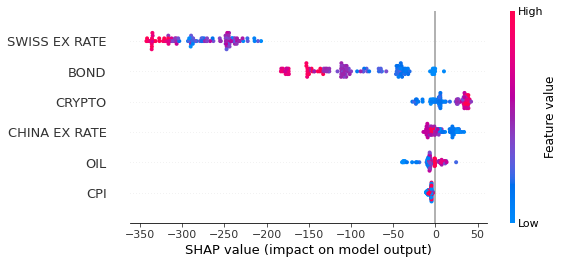

In [24]:
import shap
# explain the model's predictions using SHAP values
explainer = shap.Explainer(SINGLE_final_model, train_X)
shap_values = explainer(val_X)
shap.plots.beeswarm(shap_values, max_display=20)

The above Beeswarm summary plot indicates that SWISS EX RATE (Swiss Franc-USD Exchange Rate) is the most important feature on average, followed by BOND PRICE. Spot CPI has the least important feature among the six feature variables.

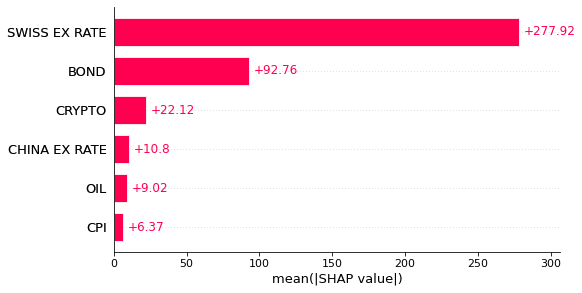

In [25]:
shap.plots.bar(shap_values.abs.mean(0))

The above bar chart shows the absolute value.

## 7) BUILDING MODEL No.2: RANDOM FOREST REGRESSOR  

In [26]:
from sklearn.ensemble import RandomForestRegressor

SINGLE_random_model = RandomForestRegressor(random_state=0)
SINGLE_random_model.fit(X,y)


RandomForestRegressor(random_state=0)

## 7a) SPLITTIG DATASET INTO TRAINING AND TESTING DATASETS FOR RANDOM FOREST REGRESSOR

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# cut_off = 550
train_X = X.iloc[0:550]
train_y = y.iloc[0:550]
val_X = X.iloc[550:]
val_y = y.iloc[550:]  
    
SINGLE_random_model = RandomForestRegressor()
SINGLE_random_model.fit(train_X,train_y)

val_predictions = SINGLE_random_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

115.36468907563075


## 7b) FIT RANDOM FOREST REGRESSOR MODEL USING ALL DATA 

In [28]:
SINGLE_random_model = RandomForestRegressor(max_leaf_nodes=500, random_state=0)
SINGLE_random_model.fit(X,y)

predictions = SINGLE_random_model.predict(X)
print(mean_absolute_error(y, predictions))

6.176882785251603


## 8) BUILDING MODEL No.3:  XG BOOST REGRESSOR 

Installing XGBOOST 

In [29]:
!pip install xgboost

In [50]:
!conda install -c conda-forge xgboost -y

Solving environment: done

# All requested packages already installed.



In [30]:
from xgboost import XGBRegressor

In [31]:
SINGLE_xgboost_model = XGBRegressor(random_state=0)
SINGLE_xgboost_model.fit(X,y)

predictions = SINGLE_xgboost_model.predict(X)
print(mean_absolute_error(y, predictions))

1.4954615389106858


## 8b) SPLITTIG DATASET INTO TRAINING AND TESTING DATASETS FOR XG BOOST REGRESSOR

In [32]:
# cut_off = 550
train_X = X.iloc[0:550]
train_y = y.iloc[0:550]
val_X = X.iloc[550:]
val_y = y.iloc[550:]  

SINGLE_xgboost_model = XGBRegressor()
SINGLE_xgboost_model.fit(train_X,train_y)

val_predictions = SINGLE_xgboost_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

138.1234850971639


## 9) CONCLUSION FROM 'MEAN ABSOLUTE ERRORS' 
## RANDOM FOREST MODEL WORKS BEST FOR THIS FORECASTING 
### SPLIT TEST MEAN ABSOLUTE ERROR COMPARITON:
### DECISION TREE MODEL: 126
### RANDOM FOREST MODEL: 115
### XG BOOST MODEL: 138

## 10) MULTIVARIABLE LINEAR REGRESSION MODEL

In [34]:
from sklearn.linear_model import LinearRegression
Single_linear_regression = LinearRegression()
# fit the data(train the model)
Single_linear_regression.fit(X, y)
# predict
y_predicted = Single_linear_regression.predict(X)

In [35]:
# cut_off = 550
train_X = X.iloc[0:550]
train_y = y.iloc[0:550]
val_X = X.iloc[550:]
val_y = y.iloc[550:]  

SINGLE_linear_regression = LinearRegression()
SINGLE_linear_regression.fit(train_X,train_y)

val_predictions = SINGLE_linear_regression.predict(val_X)

## 10a) CALCULATING R-SQUARED AND MSE OF THE LINEAR VARIABLE MODEL EQUATION

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
R2 = r2_score(val_y, val_predictions)
print('R-Squared is: ', R2)
rmse = mean_squared_error(val_y, val_predictions)
print('Mean Squared Error is: ', rmse)

R-Squared is:  0.6160604133815305
Mean Squared Error is:  2923.737949131851


R-SQUARED IS 61.6%...WHICH IS OK...
MSE IS VERY HIGH...TRY NORMALIZING THE FEATURE INPUTS!! 

## 10b) NORMALIZING THE FEATURE INPUTS TO THE SAME SCALE TO IMPROVE THE MODEL

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
print(X_scaled)

          CPI      BOND    CRYPTO  CHINA EX RATE  SWISS EX RATE       OIL
0    1.421170  0.955976  1.417931       1.346681      -0.508126  1.745937
1    1.421170  0.955976  1.417931       1.346681      -0.508126  1.745937
2    1.421170  0.990842  1.337531       1.336585      -0.422611  1.546699
3    1.421170  0.938543  1.417852       1.313027      -0.643295  1.591344
4    1.421170  0.886244  1.404439       1.264230      -0.563297  1.628660
..        ...       ...       ...            ...            ...       ...
664 -0.329774  2.507516 -0.801480       0.101501       1.671130  0.233323
665 -0.329774  2.559815 -0.804643       0.076261       1.709749  0.239320
666 -0.329774  2.542382 -0.805038       0.126741       1.731818  0.215998
667 -0.329774  2.524949 -0.803787       0.121693       1.814574  0.123375
668 -1.205246  2.577248 -0.804061       0.032511       1.894572  0.118045

[669 rows x 6 columns]


## 10c) RE-CALCULATING THE MODEL'S R-SQUARED AND MSE USING NORMALIZED FEATURE INPUTS

In [38]:
Single_linear_regression_normal = LinearRegression()
# fit the data(train the model)
Single_linear_regression_normal.fit(X, y)
# predict
y_predicted = Single_linear_regression_normal.predict(X)

In [40]:
# cut_off = 550
train_X_scaled = X_scaled.iloc[0:550]
train_y = y.iloc[0:550]
val_X_scaled = X_scaled.iloc[550:]
val_y = y.iloc[550:]  

SINGLE_linear_regression_normal = LinearRegression()
SINGLE_linear_regression_normal.fit(train_X_scaled,train_y)

val_predictions = SINGLE_linear_regression_normal.predict(val_X_scaled)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
R2 = r2_score(val_y, val_predictions)
print('R-Squared is: ', R2)
rmse = mean_squared_error(val_y, val_predictions)
print('Mean Squared Error is: ', rmse)

R-Squared is:  0.6160604133813649
Mean Squared Error is:  2923.7379491331126


Normalizing the featured inputs did not improve the model...
It did not change results at all :( 

## 10d) THE COEFFICIENTS AND Y-INTERCEPT OF THE LINEAR REGRESSION MODEL EQUATION

In [42]:
print(SINGLE_linear_regression.coef_)
print(SINGLE_linear_regression.intercept_)

[ 4.65521139e+01 -1.21211669e+02  2.56169273e-02 -9.93417659e+03
 -3.46213476e+03  5.04987506e-01]
6484.637085602542


## 10e) USING THE LINEAR MODEL, FORECASTING TODAY'S CLOSING GOLD PRICE WITH YESTERDAY'S INPUTS...

As a sanity check, I decided to manually input Jan 13th, 2022 data to make sure the model provides reasonable gold price forecast for Jan 14th, 2022.

THE LINEAR MODEL EQUATION:

GOLD PRICE FORECAST =  
6484.6 + (4.65521139e+01)CPI + (-1.21211669e+02)BOND + (2.56169273e-02)CRYPTO + (-9.93417659e+03)CHINA_EX_RATE + (-3.46213476e+03)SWISS_EX_RATE + (5.04987506e-01)OIL_PRICE

January 13th closing inputs:

CPI = 0.5

BOND = 1.47

CRYPTO = 3276.9

CHINA_EX_RATE = 0.15657 

SWISS_EX_RATE = .9104

OIL_PRICE = 82.12

In [1]:
GOLD_TODAY_FORECAST = 6484.6 + (4.65521139e+01)*(0.5) + (-1.21211669e+02)*(1.47) + (2.56169273e-02)*(3276.9) + (-9.93417659e+03)*(0.15657) + (-3.46213476e+03)*(.9104) + (5.04987506e-01)*(82.12)
print ("THE LINEAR MODEL SAYS GOLD PRICE SHOULD CLOSE AT USD",round(GOLD_TODAY_FORECAST), 'ON FRIDAY, JANUARY 14, 2022')

THE LINEAR MODEL SAYS GOLD PRICE SHOULD CLOSE AT USD 1748 ON FRIDAY, JANUARY 14, 2022


This is a reasonable estimate. It's not a ridiculous number for gold price. 

However, 

GOLD PRICE actually closed at USD1816.4 on Friday, January 14th, 2022, a -0.003% change from USD1821.4 on Thursday, January 13th, 2022. 

In [4]:
OFF = ((GOLD_TODAY_FORECAST-1816.4)/1816.4)*100
print("THE MODEL FORECAST IS OFF BY",OFF, "%.")


THE MODEL FORECAST IS OFF BY -3.77741288362752 %.


This is quite a bit off. The model is not accurate enough to be used as an investment tool.

## CONCLUSION
## With R-square of 62%, we cannot rely on our 'ML  goose' to lay golden eggs.

## <font color='orange'>Lastly, I would like to express my gratitude to Om and Tushar for their guidance and to Anan for his offer to help! </font> 

![title](http://localhost:8888/files/Final%20Project%20-%20Gold%20Price%20Prediction/goosepdf.pdf)